In [4]:
import cv2
import matplotlib.pyplot as plt

In [13]:
class Cartoonizer:
    """Cartoonizer effect.

    A class that applies a cartoon effect to an image.

    The class uses a bilateral filter and adaptive thresholding to create
    a cartoon effect.
    """

    def __init__(self):
        pass

    def render(self, img_rgb):
        """Render the cartoonized version of the input image."""
        img_rgb = cv2.imread(img_rgb)
        img_rgb = cv2.resize(img_rgb, (1366, 768))

        numDownSamples = 2  # number of downscaling steps
        numBilateralFilters = 50  # number of bilateral filtering steps

        # Downsample image using Gaussian pyramid
        img_color = img_rgb
        for _ in range(numDownSamples):
            img_color = cv2.pyrDown(img_color)

        # Repeatedly apply small bilateral filter instead of applying
        # one large filter
        for _ in range(numBilateralFilters):
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

        # Upsample image to original size
        for _ in range(numDownSamples):
            img_color = cv2.pyrUp(img_color)

        # Convert to grayscale and apply median blur
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        img_blur = cv2.medianBlur(img_gray, 3)

        # Detect and enhance edges
        img_edge = cv2.adaptiveThreshold(
            img_blur, 255,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY, 9, 2)

        # Convert back to color so that it can be bit-ANDed with color image
        (x, y, z) = img_color.shape
        img_edge = cv2.resize(img_edge, (y, x))
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)

        return cv2.bitwise_and(img_color, img_edge)

# Create an instance of the Cartoonizer class
tmp_canvas = Cartoonizer()

# Set the file name of the input image
file_name = "Robot.jpg"

# Render the cartoonized version of the input image
res = tmp_canvas.render(file_name)

# Save and display the cartoonized image
cv2.imwrite("Cartoon version.jpg", res)
cv2.imshow("Cartoon version", res)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


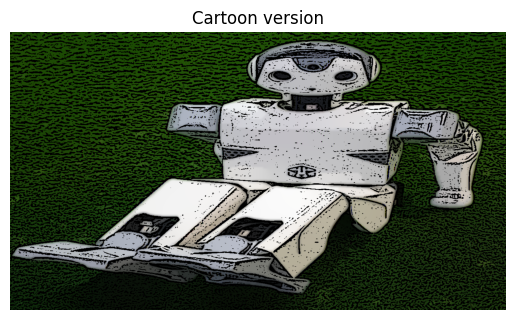

In [18]:
import matplotlib.pyplot as plt

# Display the cartoonized image using Matplotlib
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.title("Cartoon version")
plt.axis('off')  # Turn off axis
plt.show()
